#**Задание 1**

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
from tensorflow import keras 
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing import image
 
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
 
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


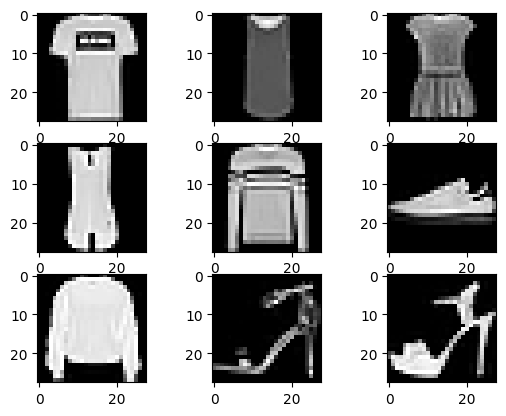

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10,  activation='softmax')
])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 64)        

In [ ]:
print(X_train.shape)
X_train = X_train.reshape((X_train.shape[0], 
                           X_train.shape[1], 
                           X_train.shape[2], 
                           1))
print(X_train.shape)
X_train = X_train/ 255.0
X_test = X_test.reshape((X_test.shape[0], 
                         X_test.shape[1], 
                         X_test.shape[2], 1))
X_test = X_test/ 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:
from keras import optimizers

EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(X_train, y_train, batch_size=128, epochs=EPOCH, validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 95s 198ms/step - loss: 0.2177 - accuracy: 0.9209 - val_loss: 0.2504 - val_accuracy: 0.9083
Epoch 2/5
469/469 [==============================] - 94s 200ms/step - loss: 0.2006 - accuracy: 0.9266 - val_loss: 0.2419 - val_accuracy: 0.9154
Epoch 3/5
469/469 [==============================] - 92s 196ms/step - loss: 0.1869 - accuracy: 0.9316 - val_loss: 0.2486 - val_accuracy: 0.9111
Epoch 4/5
469/469 [==============================] - 93s 199ms/step - loss: 0.1734 - accuracy: 0.9359 - val_loss: 0.2427 - val_accuracy: 0.9142
Epoch 5/5
469/469 [==============================] - 95s 202ms/step - loss: 0.1619 - accuracy: 0.9408 - val_loss: 0.2485 - val_accuracy: 0.9138


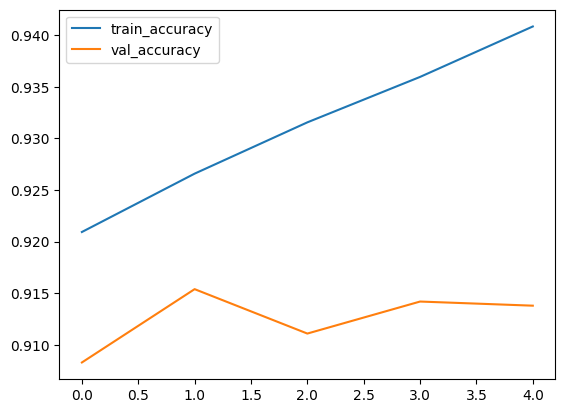

In [ ]:
plt.plot(his.history['accuracy'], label="train_accuracy")
plt.plot(his.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

In [ ]:
a = ['T-shirt/top','Trouser','Pullovers','dress','Coat','Sandals','shirt','Sneaker','Bag','Ankle boot']

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
output = image.copy()
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
cv2_imshow(orig)

Saving загружено (1).jfif to загружено (1).jfif


1/1 [==============================] - 0s 24ms/step


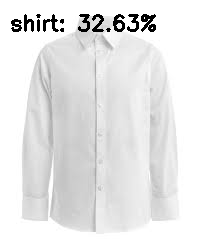

In [ ]:
image=image/ 255
preds = model.predict(image)
max_value = max(preds[0])
max_index = list(preds[0]).index(max_value)
text = "{}: {:.2f}%".format(a[max_index], preds[0][max_index] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)
cv2_imshow(output)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
output = image.copy()
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
cv2_imshow(orig)

Saving загружено.jfif to загружено.jfif


1/1 [==============================] - 0s 106ms/step


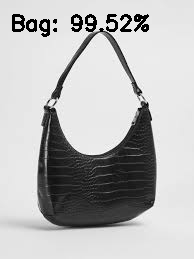

In [ ]:
image=image/255
preds = model.predict(image)
max_value = max(preds[0])
max_index = list(preds[0]).index(max_value)
text = "{}: {:.2f}%".format(a[max_index], preds[0][max_index] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)
cv2_imshow(output)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
output = image.copy()
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
cv2_imshow(orig)

Saving 02sybsjk13ua1apnefqqe3wsmmorno3c.jpg to 02sybsjk13ua1apnefqqe3wsmmorno3c.jpg


1/1 [==============================] - 0s 22ms/step


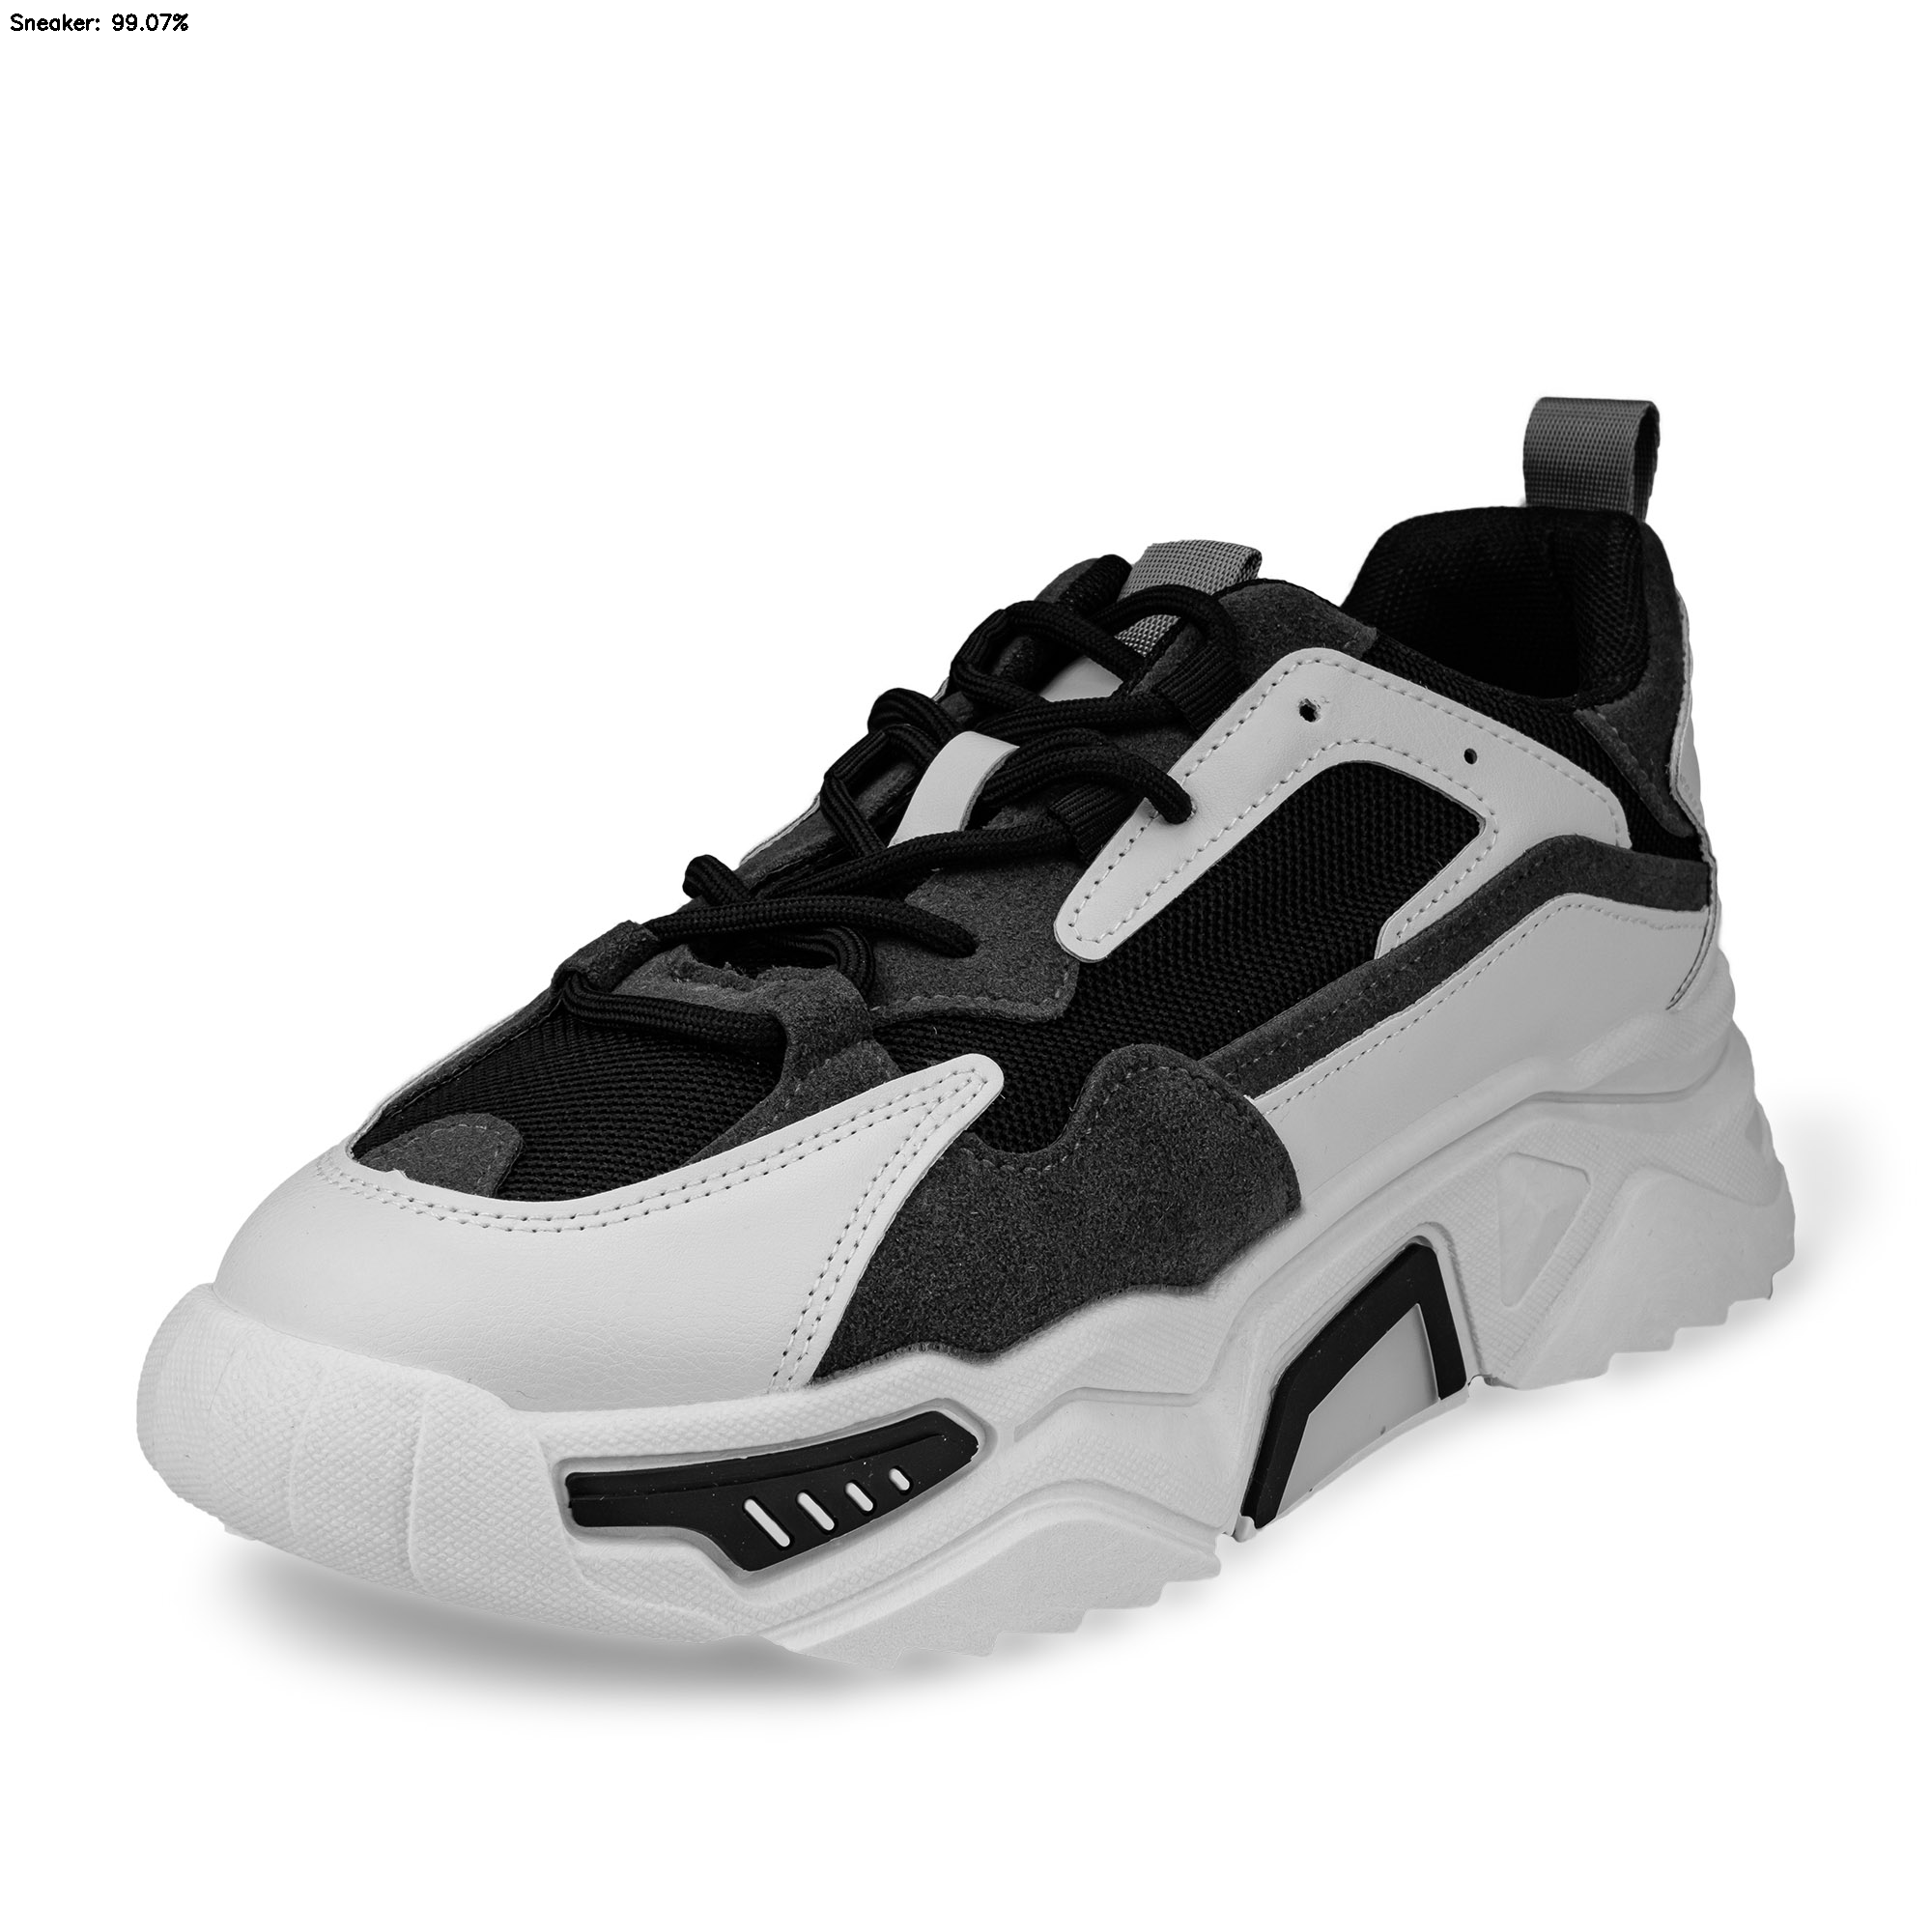

In [ ]:
image=image/255
preds = model.predict(image)
max_value = max(preds[0])
max_index = list(preds[0]).index(max_value)
text = "{}: {:.2f}%".format(a[max_index], preds[0][max_index] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)
cv2_imshow(output)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() 

# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE) # Преобразование изображения в оттенки серого при считывании
output = image.copy()
image = cv2.resize(image, (28, 28)) # Изменение разрешения изображения
image = cv2.bitwise_not(image) # Инверсия цветов (если в оригинале цифра написана черным цветом на белом фоне)
orig = image
image = image.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
cv2_imshow(orig)

Saving 6140.60_73_500.jpg to 6140.60_73_500.jpg


1/1 [==============================] - 0s 36ms/step


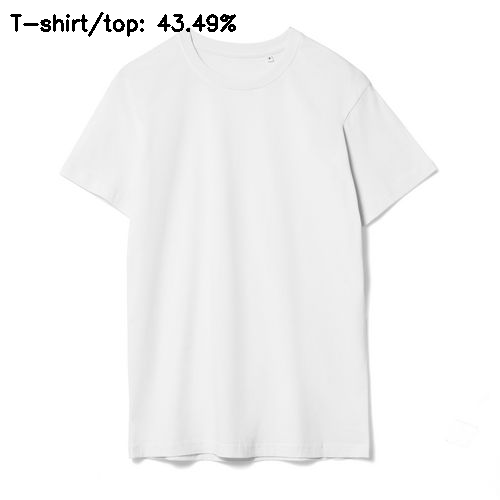

In [ ]:
image=image/255
preds = model.predict(image)
max_value = max(preds[0])
max_index = list(preds[0]).index(max_value)
text = "{}: {:.2f}%".format(a[max_index], preds[0][max_index] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)
cv2_imshow(output)

#**Задание 3**

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from keras.optimizers import Adam, SGD

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

In [ ]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

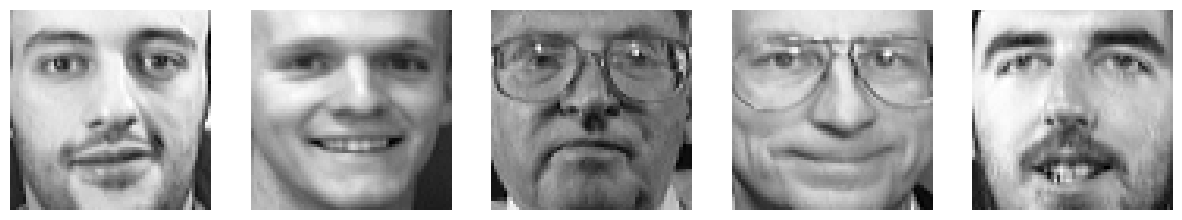

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64)

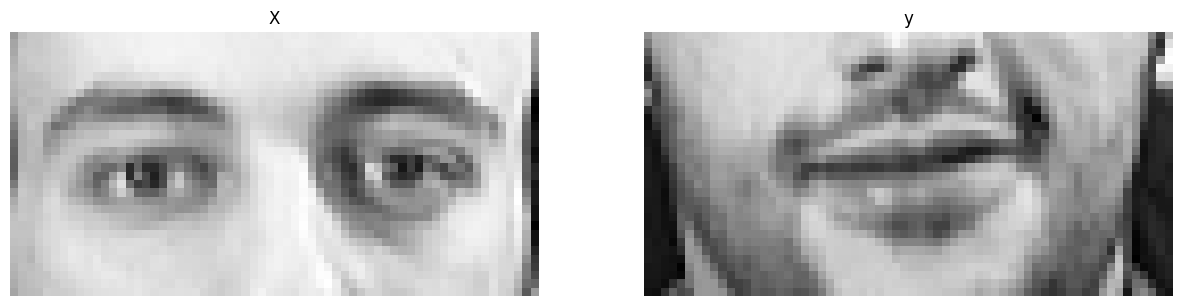

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

In [ ]:
from keras import optimizers
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

model = keras.Sequential([
    Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (5,5), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(2048,  activation='softmax')
])


model.summary()

optimizer = optimizers.Adam(learning_rate=0.0001)

EPOCH = 15

model.compile(optimizer=optimizer,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

X_train.shape, y_train_n.shape

his = model.fit(X_train, y_train_n, batch_size=1000, epochs=EPOCH, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 64, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 32, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 16, 128)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 16, 256)        819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 8, 256)       